# Posterior Distributions
Andrew Esch, Evan Lee, and Collin Stratton

CST-425

Dr. Isac Artzi

2 April, 2022

# Introduction
The purpose of this assignment is to explore Markov Chain Monte Carlo (MCMC) by predicting the likelihood of people visiting a given attraction. This project will analyze and visualize the posterior distributions of the locations visited by tourists.

## Markov Chain Monte Carlo
Markov Chain Monte Carlo (MCMC) is a technique for systematic random sampling from high-dimensional probability distributions. The Markov Chain draws samples from the distribution, and then uses the samples to update the distribution. The process is repeated until a desired number of samples is obtained, even with a large number of random variables. It's not as effective for high-dimensional probabilistic methods, but it provides an alternative approach to random sampling. Metropolis-Hastings algorithm, the algorithm used in the MCMC for this project, is a common approach to Markov Chain Monte Carlo.

# Setup
The data was taken from halo and will be used to show off the markov chain monte carlo algorithms.

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MarkovFunctions import *

In [11]:
# read in data
df = pd.read_csv("./syntheticdata.csv", header=None)
# row and column headers list
headers = ["Museum", "Concert", "Sports Event", "Restaurant", "Hike"]

print(df)

   0  1  2  3  4
0  1  3  5  3  3
1  7  1  4  6  3
2  8  2  2  5  4
3  5  4  5  3  1
4  2  4  1  5  1


In [12]:
# Convert into a probabilistic matrix, and then convert the probabilistic matrix into a transition matrix
transitionMatrix = df.div(df.sum(axis=1), axis=0)
transitionMatrix = transitionMatrix.to_numpy()

print(transitionMatrix)

[[0.06666667 0.2        0.33333333 0.2        0.2       ]
 [0.33333333 0.04761905 0.19047619 0.28571429 0.14285714]
 [0.38095238 0.0952381  0.0952381  0.23809524 0.19047619]
 [0.27777778 0.22222222 0.27777778 0.16666667 0.05555556]
 [0.15384615 0.30769231 0.07692308 0.38461538 0.07692308]]


# Markov Chain
## Generate Steady State Distribution Graphs from the Transition Matrix using Markov Chains

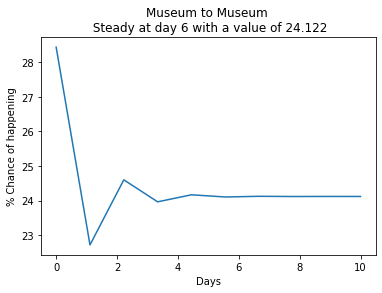

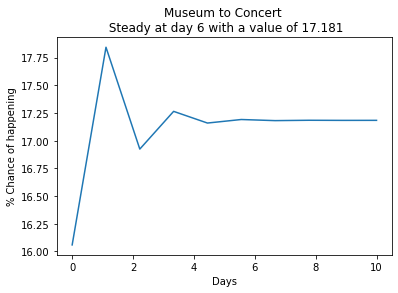

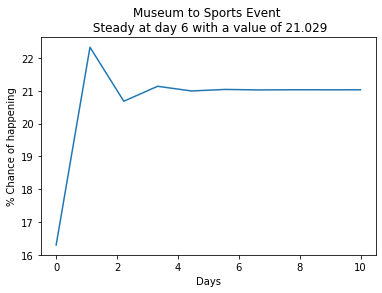

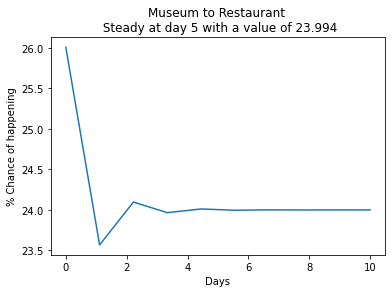

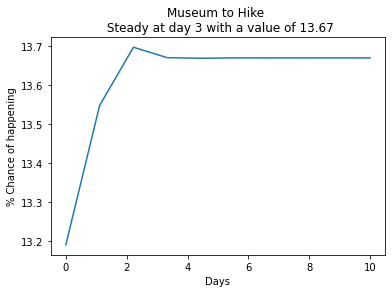

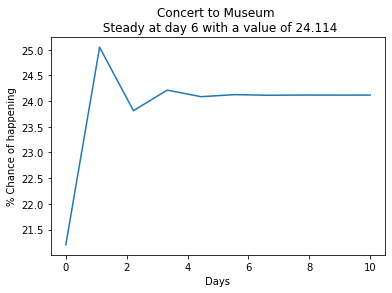

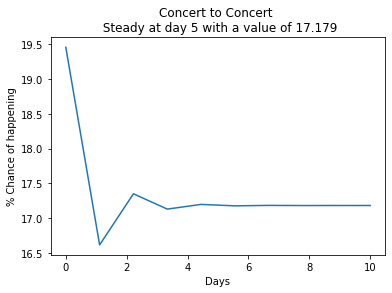

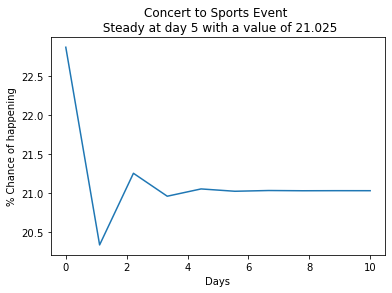

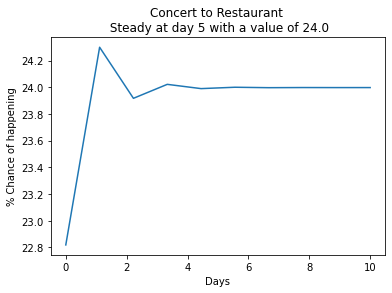

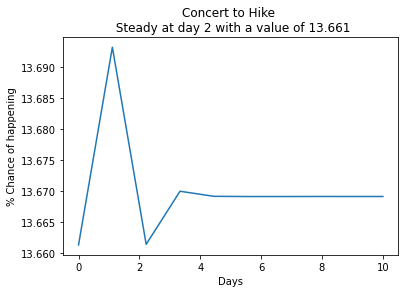

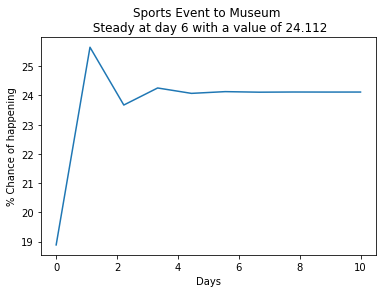

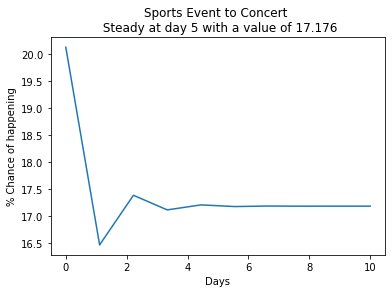

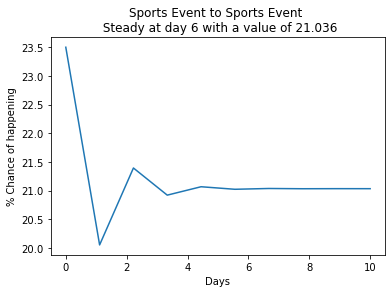

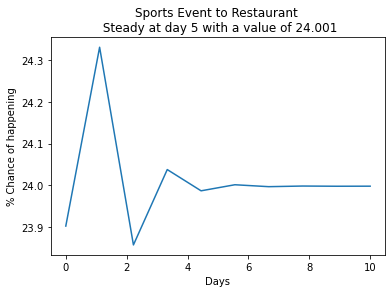

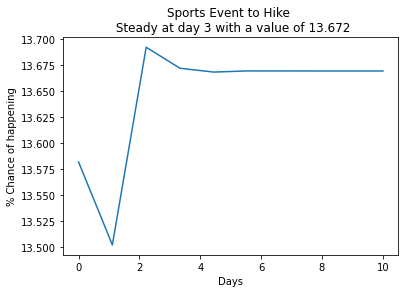

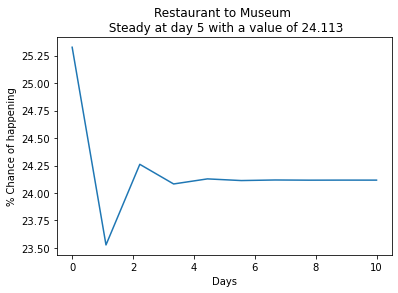

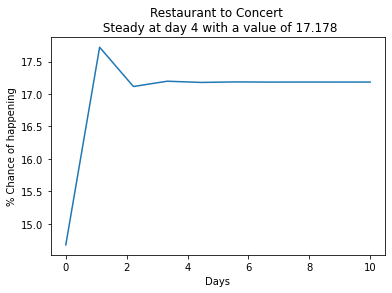

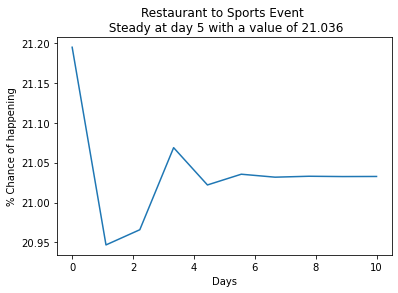

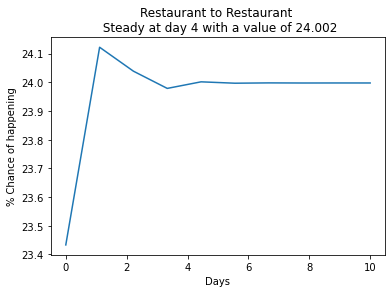

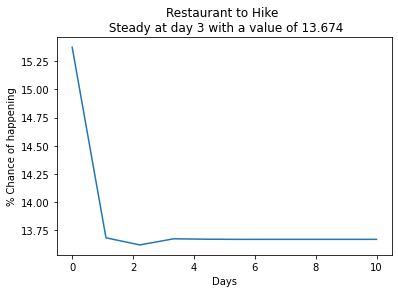

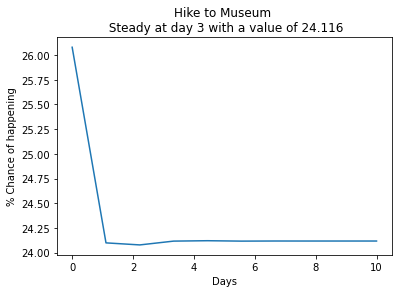

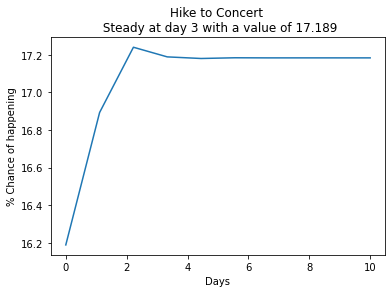

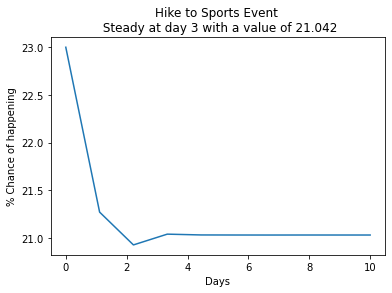

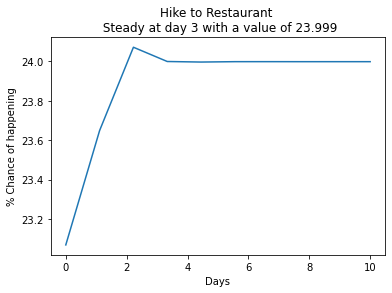

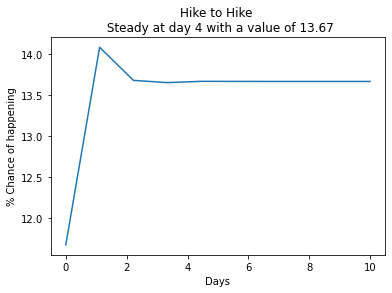

In [13]:
# Generate graphs from transition matrix to illustrate the Markov Chain
for i in range(transitionMatrix.shape[0]):
    for j in range(transitionMatrix.shape[1]):
        markovPlot(transitionMatrix, i, j, 11)

## Finding Probabilities
### Find the likelihood that a tourist would attend a concert, then go on a hike, then eat at a restaurant

In [14]:
# multiply the transition probability of concert to hike by hike to restaurant
concertHikeRestaurant = transitionMatrix[1][4] * transitionMatrix[4][3]
print("Percent odds of Concert to Hike to Restaurant = ", concertHikeRestaurant * 100)

Percent odds of Concert to Hike to Restaurant =  5.4945054945054945


### Find the likelihood of visiting any of the locations as the fifth step

In [15]:
# find the probabilities of the transition matrix on the 5th step
transDot = transitionMatrix
for i in range(4):  # Four transitions, so run 4 times
    transDot = np.dot(transDot, transitionMatrix)

# starting probability vector
spv = np.array([.2, .2, .2, .2, .2])

# sum the columns of the fifth step
sum_trans = transDot.sum(axis=0)

# multiply the starting probability vector by the sum of the columns
spv_tran = sum_trans * spv

# print the likelihood of visiting any of the locations as the fifth step
print("\nPercent odds of visiting the Museum 5th = ", spv_tran[0] * 100)
print("Percent odds of visiting the Concert 5th = ", spv_tran[1] * 100)
print("Percent odds of visiting the Sports Event 5th = ", spv_tran[2] * 100)
print("Percent odds of visiting the Restaurant 5th = ", spv_tran[3] * 100)
print("Percent odds of visiting the Hike 5th = ", spv_tran[4] * 100)


Percent odds of visiting the Museum 5th =  24.126087183341497
Percent odds of visiting the Concert 5th =  17.179216143611463
Percent odds of visiting the Sports Event 5th =  21.02655442956296
Percent odds of visiting the Restaurant 5th =  24.00018403603868
Percent odds of visiting the Hike 5th =  13.667958207445393


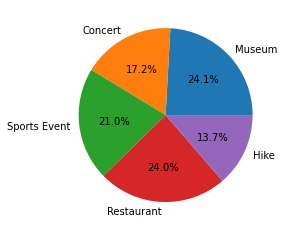

In [16]:
plt.pie(spv_tran, labels=headers, autopct='%1.1f%%')
plt.show()

## Metropolis-Hastings MCMC
Using the resources provided in class, as well as a myriad of online resources, we can implement the Metropolis-Hastings Markov-Chain Monte-Carlo (MCMC) algorithm using data from the transition matrix. The basic overview of how the Metro Hastings MCMC should have been implemented is as follows:
1. Start with a random sample using probabilities from the transition matrix (on a specific day).
2. Determine the probability density associated with the sample.
3. Propose a new, arbitrary sample and attempt to determine its probability density.
4. Compare probability densities using the accept-reject algorithm in order to quantify the desire to move (or take a random walk)
5. Generate a random number. Then, compare with the rest of the proposed sample to decide whether to move or stay.
6. Repeat for n number of times to see if the convergence criteria is met. If the criteria is met, the algorithm is complete.


In the context of the CST-425 Synthetic City Data Table, the Metropolis-Hastings MCMC algorithm can be utilized to answer specific questions related to finding the distribution of data events. Thus, for this project, we will be answering the following questions using the Metropolis-Hastings MCMC algorithm:
- What is the true probability density function that describes the probability of visited locations in town after 3 days?
- What is the town's most popular location after 3 days?

Below is our implementation of Metropolis-Hastings MCMC to answer this question.

C:\Users\Drew\AppData\Local\Temp\ipykernel_31412\3597266774.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step=step, start=start, random_seed=123456)  # Perform sampling
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [Theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.
The number of effective samples is smaller than 25% for some parameters.



Trace:  [0.68148939 0.68148939 0.68148939 ... 0.37789512 0.37789512 0.9250833 ]


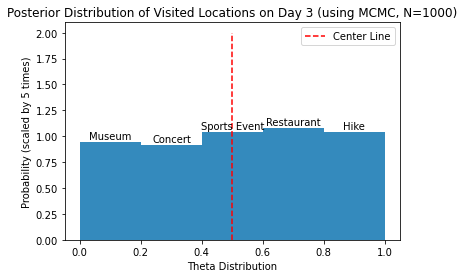

In [24]:
import pymc3 as pm

# Following step 8 from before, use the transition matrix to generate the transition probabilities for each location on day 3
transDot = transitionMatrix  # Reset the transition matrix variable
for i in range(2):  # Two transitions to generate the day 3 transition matrix, so run 2 times
    transDot = np.dot(transDot, transitionMatrix)

# Generate the transition probability vector for day 3
transitionResult = transDot.sum(axis=0)
probVector = np.array([.2, .2, .2, .2, .2])
locationProbabilities = transitionResult * probVector

# Create a random training dataset
def randomDataset(n):
    choicesList = [0, 1, 2, 3, 4]
    return np.random.choice(choicesList, size=n, replace=True, p=locationProbabilities)


training = np.array(randomDataset(100))  # Create a random dataset with 1000 observations

# Create the model with initial conditions
with pm.Model() as model:
    # Define the prior parameters
    theta = pm.Beta("Theta", alpha=1, beta=1)  # Define a basic beta distribution for the prior distribution
    observed = pm.Normal("Observed", mu=0, sigma=1, observed=training)  # Define likelihood using a normal Gaussian distribution with observed data

# Perform Metropolis-Hastings sampling
num_samples = 1000  # Set the number of total samples to take

with model:
    start = pm.find_MAP()  # Find the MAP of the model
    step = pm.Metropolis()  # Use sampling with Metropolis-Hastings steps
    trace = pm.sample(num_samples, step=step, start=start, random_seed=123456)  # Perform sampling

# Plot the Metropolis-Hastings results
print("\nTrace: ", trace["Theta"])

# Create a plot with a simple title
fig, ax = plt.subplots(1, 1)
ax.set_title(f"Posterior Distribution of Visited Locations on Day 3 (using MCMC, N=1000)")

# Generate a center line to demonstrate the center of the distribution
plt.vlines(0.5, 0, 2, linestyle='--', label="Center Line", color='red')

# Create the histogram
plt.hist(trace["Theta"], bins=5, histtype='bar', density=True, color='#348ABD')

# Generate histogram labels
rect = ax.patches
labels = ["Museum", "Concert", "Sports Event", "Restaurant", "Hike"]

for rect, labels in zip(rect, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, labels, ha='center', va='bottom')

# Create a legend and axis titles, then display the plot
ax.legend()
ax.set_xlabel("Theta Distribution") # Label the x-axis
ax.set_ylabel("Probability (scaled by 5 times)") # Label the y-axis
plt.show()

# Conclusion
Monte Carlo Markov Chains are a powerful tool for modeling and analyzing data. In this notebook, we attempted to implement MCMC's in various ways and tried implementing the Metro Hastings MCMC. However, we ran into various issues with the implementation approaches we used, such as tools being caught in an infinite loop (known issue with the library), errors with versions of tools not being compatible, and various other issues that stalled the development of the Metro Hastings MCM in our code. Overall, MCMC's proved useful in many situations, and can help shape the interpretation of data.

# Resources
https://people.duke.edu/~ccc14/sta-663/MCMC.html

https://machinelearningmastery.com/markov-chain-monte-carlo-for-probability/

http://theoryandpractice.org/intro-exp-phys-book/distributions/accept-reject.html

https://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html

https://towardsdatascience.com/bayesian-statistics-metropolis-hastings-from-scratch-in-python-c3b10cc4382d

https://towardsdatascience.com/introduction-to-pymc3-a-python-package-for-probabilistic-programming-5299278b428